In [21]:
# !pip install muspy
import muspy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import tqdm

In [229]:
lead_sheet=muspy.WikifoniaDataset("~/userdata/datasets/wikifonia_lead_sheet/", download_and_extract=True)
lead_sheet.convert()

Skip downloading as the `.muspy.success` file is found.
Skip extracting as the `.muspy.success` file is found.
Converting and saving the dataset...


  0%|▋                                                                                                                                                                                                   | 21/6434 [00:07<36:12,  2.95it/s]


KeyboardInterrupt: 

In [2]:
essen = muspy.EssenFolkSongDatabase("~/userdata/datasets/essen_folk/", download_and_extract=True)

Skip downloading as the `.muspy.success` file is found.
Skip extracting as the `.muspy.success` file is found.


In [199]:
nes = muspy.NESMusicDatabase("~/userdata/datasets/nes/")
nes.convert()

Skip conversion as the `.muspy.success` file is found.


NESMusicDatabase(root=/home/teo/userdata/datasets/nes)

In [231]:
nes_torch = nes.to_pytorch_dataset(representation='note')

In [232]:
nes_torch[0]

array([[     7,     76,      1,     10],
       [     8,     60,  25685,     10],
       [    41,     13,   2930,     12],
       ...,
       [810142,     13,   2930,     12],
       [818931,     57,   8071,      1],
       [818948,     13,   2930,     12]])

In [42]:
essen.convert()

Converting and saving the dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10457/10457 [03:52<00:00, 45.02it/s]


Successfully saved 9034 out of 10457 files.


EssenFolkSongDatabase(root=/home/teo/userdata/datasets/essen_folk)

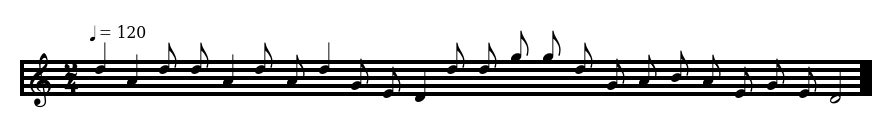

In [221]:
muspy.show_score(essen[2])

In [3]:
entire_set = essen.to_pytorch_dataset(representation='note')
dataset = essen.to_pytorch_dataset(representation='note', splits=(0.6, 0.2, 0.2))
print( len(dataset['train']), len(dataset['validation']), len(dataset['test']) )
# train_set = essen.to_pytorch_dataset(representation='note', subset="Training")

5420 1807 1807


In [188]:
type(essen[0])

muspy.music.Music

Exception ignored in: <function Wave_write.__del__ at 0x7f2127e1d550>
Traceback (most recent call last):
  File "/usr/lib/python3.8/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.8/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.8/wave.py", line 468, in _ensure_header_written
    self._write_header(datasize)
  File "/usr/lib/python3.8/wave.py", line 472, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


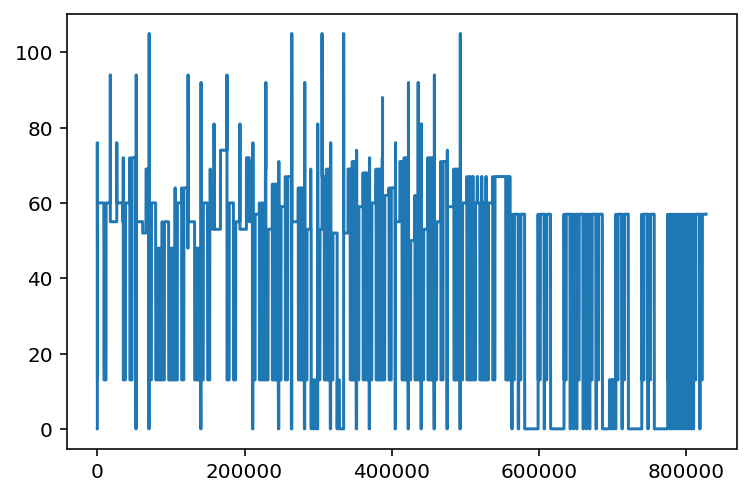

In [201]:

plt.plot(muspy.to_pitch_representation(essen[0]))

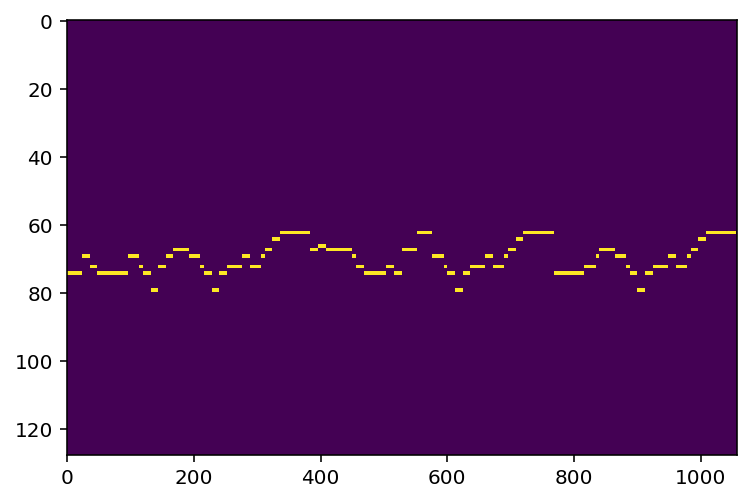

In [197]:
plt.imshow(muspy.to_pianoroll_representation(essen[0]).T, aspect='auto', interpolation='nearest')

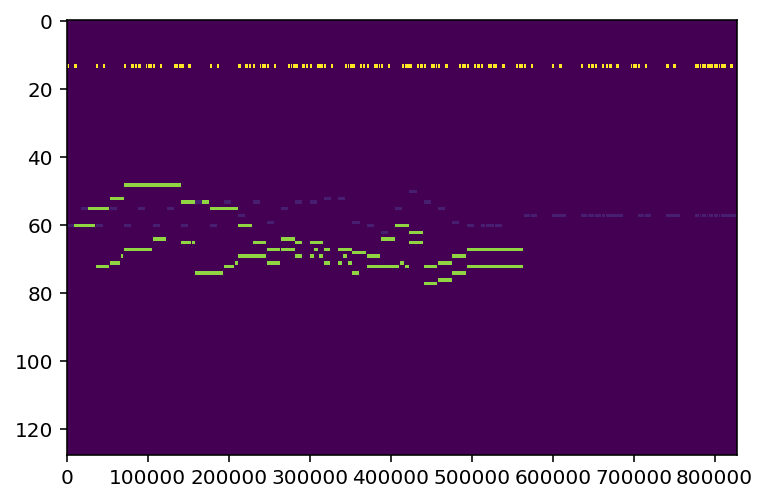

In [202]:
plt.imshow(muspy.to_pianoroll_representation(nes[0]).T, aspect='auto', interpolation='nearest')

In [212]:
muspy.to_note_representation(essen[0]).squeeze().tolist()

[[0, 74, 24, 64],
 [24, 69, 12, 64],
 [36, 72, 12, 64],
 [48, 74, 24, 64],
 [72, 74, 24, 64],
 [96, 69, 18, 64],
 [114, 72, 6, 64],
 [120, 74, 12, 64],
 [132, 79, 12, 64],
 [144, 72, 12, 64],
 [156, 69, 12, 64],
 [168, 67, 24, 64],
 [192, 69, 18, 64],
 [210, 72, 6, 64],
 [216, 74, 12, 64],
 [228, 79, 12, 64],
 [240, 74, 12, 64],
 [252, 72, 24, 64],
 [276, 69, 12, 64],
 [288, 72, 18, 64],
 [306, 69, 6, 64],
 [312, 67, 12, 64],
 [324, 64, 12, 64],
 [336, 62, 48, 64],
 [384, 67, 12, 64],
 [396, 66, 12, 64],
 [408, 67, 24, 64],
 [432, 67, 18, 64],
 [450, 69, 6, 64],
 [456, 72, 12, 64],
 [468, 74, 12, 64],
 [480, 74, 24, 64],
 [504, 72, 12, 64],
 [516, 74, 12, 64],
 [528, 67, 24, 64],
 [552, 62, 24, 64],
 [576, 69, 18, 64],
 [594, 72, 6, 64],
 [600, 74, 12, 64],
 [612, 79, 12, 64],
 [624, 74, 12, 64],
 [636, 72, 24, 64],
 [660, 69, 12, 64],
 [672, 72, 18, 64],
 [690, 69, 6, 64],
 [696, 67, 12, 64],
 [708, 64, 12, 64],
 [720, 62, 48, 64],
 [768, 74, 48, 64],
 [816, 72, 18, 64],
 [834, 69, 6,

In [4]:
unique_duration = set()
unique_pitch = set()
for item in entire_set:
  unique_duration = set(item[:,2]) | unique_duration
  unique_pitch = set(item[:,1])| unique_pitch
print(unique_duration)

{384, 2, 3, 4, 132, 6, 8, 9, 138, 264, 12, 15, 144, 16, 18, 21, 24, 156, 28, 30, 32, 288, 36, 168, 40, 42, 48, 1332, 54, 60, 64, 192, 66, 72, 78, 336, 84, 90, 96, 108, 240, 372, 120, 252}


In [5]:
class MelodyDataset:
  def __init__(self, dataset, unique_pitch, unique_duration ):
    self.data = dataset
    self.pitch_to_id = {pitch:i+1 for i, pitch in enumerate(sorted(list(unique_pitch)))}
    self.dur_to_id= {dur:i+1 for i, dur in enumerate(sorted(list(unique_duration)))}
    
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self, idx):
    item = self.data[idx]
    dummy = torch.zeros(len(item), 2, dtype=torch.long)
    dummy[:,0] = torch.Tensor(np.vectorize(self.pitch_to_id.get)(item[:,1]))
    dummy[:,1] = torch.Tensor(np.vectorize(self.dur_to_id.get)(item[:,2]))
    return dummy

train_set = MelodyDataset(dataset['train'], unique_pitch, unique_duration)
valid_set = MelodyDataset(dataset['validation'], unique_pitch, unique_duration)
train_set[0]


tensor([[27, 12],
        [22,  7],
        [25,  7],
        [27, 12],
        [27, 12],
        [22, 10],
        [25,  4],
        [27,  7],
        [32,  7],
        [25,  7],
        [22,  7],
        [20, 12],
        [22, 10],
        [25,  4],
        [27,  7],
        [32,  7],
        [27,  7],
        [25, 12],
        [22,  7],
        [25, 10],
        [22,  4],
        [20,  7],
        [17,  7],
        [15, 19],
        [20,  7],
        [19,  7],
        [20, 12],
        [20, 10],
        [22,  4],
        [25,  7],
        [27,  7],
        [27, 12],
        [25,  7],
        [27,  7],
        [20, 12],
        [15, 12],
        [22, 10],
        [25,  4],
        [27,  7],
        [32,  7],
        [27,  7],
        [25, 12],
        [22,  7],
        [25, 10],
        [22,  4],
        [20,  7],
        [17,  7],
        [15, 19],
        [27, 19],
        [25, 10],
        [22,  4],
        [20, 12],
        [22, 10],
        [25,  4],
        [27,  7],
        [3

In [46]:
def pad_collate(batch):
  return  nn.utils.rnn.pad_sequence(batch, batch_first=True)
  

train_loader = DataLoader(train_set, shuffle=True, batch_size=32, collate_fn=pad_collate)
batch = next(iter(train_loader))

In [85]:
class MyFirstMusicGenerator(nn.Module):
  def __init__(self, num_pitches, num_durations, embedding_size, hidden_size):
    super().__init__()
    self.num_pitches = num_pitches
    self.num_durations = num_durations
    self.hidden_size = hidden_size
    self.num_layers = 3
    
    self.pitch_embedding = nn.Embedding(num_pitches, embedding_size)
    self.duration_embedding = nn.Embedding(num_durations, embedding_size)
    self.rnn = nn.LSTM(embedding_size * 2, hidden_size, num_layers=self.num_layers, batch_first=True)
#     self.final_rnn = nn.LSTM(hidden_size + embedding_size *2, hidden_size, num_layers=1, batch_first=True)
    self.final_linear = nn.Linear(hidden_size, num_pitches+num_durations)
    
  def forward(self, x):
    # N x T x 2 
    pitch_embedding = self.pitch_embedding(x[..., 0])
    duration_embedding = self.duration_embedding(x[..., 1])
    concat_embedding = torch.cat([pitch_embedding, duration_embedding], dim=-1)
    
    rnn_states, _ = self.rnn(concat_embedding)
#     prev_embedding = torch.cat([self.pitch_embedding(shifted_y[...,0]), self.duration_embedding(shifted_y[...,0])])  
#     hidden_with_prev = torch.cat([rnn_states, prev_embedding], dim=-1)
    
#     final_hidden, _ = self.final_rnn(hidden_with_prev)
    final_out = self.final_linear(rnn_states)
    final_out = torch.cat([torch.softmax(final_out[...,:self.num_pitches], dim=-1),
                           torch.softmax(final_out[...,self.num_pitches:], dim=-1)
                          ], dim=-1)

    return final_out
  
  def generate(self, x, num_notes=50):
#     hidden_states = (torch.zeros(self.num_layers, self.hidden_size), torch.zeros(self.num_layers, self.hidden_size))
    pitch_embedding = self.pitch_embedding(x[..., 0])
    duration_embedding = self.duration_embedding(x[..., 1])
    concat_embedding = torch.cat([pitch_embedding, duration_embedding], dim=-1)

    final_hidden, hidden_states = self.rnn(concat_embedding)
    
    final_hidden = final_hidden[:,-2:-1]
    
    output_pitch_duration = []
    for i in range(num_notes):
      output = self.final_linear(final_hidden)
      pitch_output = torch.softmax(final_out[...,:self.num_pitches], dim=-1)
      dur_output = torch.softmax(final_out[...,self.num_pitches:], dim=-1)
      
      selected_pitch = pitch_output.multinomial(num_samples=1)
      selected_duration = dur_output.multinomial(num_samples=1)
      output_pitch_duration.append([selected_pitch, selected_duration])
      
      if selected_pitch==0 or selected_duration==0:
        break
    
      cur_pitch_embedding = self.pitch_embedding(selected_pitch)
      cur_duration_embedding = self.duration_embedding(selected_duration)
      cur_concat_embedding = torch.cat([cur_pitch_embedding, cur_duration_embedding], dim=-1)
      final_hidden, hidden_states = self.rnn(cur_concat_embedding, hidden=hidden_states)
    
    return output_pitch_duration
    
    
num_pitches = len(unique_pitch) + 1
num_durations = len(unique_duration)+1


model = MyFirstMusicGenerator(num_pitches, num_durations, 64, 512)

In [149]:

def nll_loss(log_pred, target_idx, mask):
  log_pred = log_pred.view(-1, log_pred.shape[-1])
  loss = -log_pred[torch.arange(len(log_pred)), target_idx.view(-1)]
  loss *= mask.view(-1)
  return loss.mean()
  
def run_train_loop(model, optimizer, train_loader, loss_func, num_epochs, device):
  model= model.to(device)
  model.train()
  
  loss_record = []
  for epoch in tqdm.tqdm(range(num_epochs)):
    for x in train_loader:
      x = x.to(device)
      shifted_x = torch.zeros_like(x)
      shifted_x[:,:-1] = x[:,1:]
      est = model(x)
      log_est = torch.log(est+1e-8)
      mask = x[:,:,0]!=0
      loss = loss_func(log_est[:,:,:model.num_pitches], shifted_x[:,:,0], mask) \
            + loss_func(log_est[:,:,model.num_pitches:], shifted_x[:,:,1], mask) 
      optimizer.zero_grad()
      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(), 2.0)
      optimizer.step()
      loss_record.append(loss.item())
  return loss_record

model = MyFirstMusicGenerator(num_pitches, num_durations, 64, 512)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = torch.nn.NLLLoss()

loss = run_train_loop(model, optimizer, train_loader, nll_loss, 50, device='cuda')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:03<00:00,  4.87s/it]


In [150]:
torch.save(model.state_dict(), 'melody_rnn_512.pt')

In [144]:
def category_to_value(atensor, pitch_vocab, dur_vocab):
  dummy = np.zeros( [len(atensor), 4], np.int32)
  dummy[:,3] = 64
  dummy[:,1] = pitch_vocab[atensor[:,0].numpy()]
  dummy[:,2] = dur_vocab[atensor[:,1].numpy()]
  dummy[:,0] = np.cumsum(dummy[:,2])
  return dummy

item = batch[0]
pitch_vocab = np.asarray([0]+[k for k, v in train_set.pitch_to_id.items()])
dur_vocab = np.asarray([0]+[k for k, v in train_set.dur_to_id.items()])

recon_note_sequence = category_to_value(item, pitch_vocab, dur_vocab)
recon = muspy.from_note_representation(recon_note_sequence[:10])





/home/teo/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/teo/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


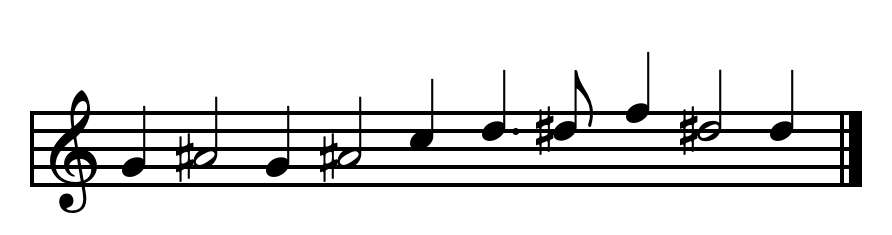

In [151]:
muspy.show_score(recon)

In [ ]:
muspy.download_bravura_font()
muspy.download_musescore_soundfont()

In [148]:
muspy.synthesize(recon)

FileNotFoundError: [Errno 2] No such file or directory: 'fluidsynth'

In [133]:
np.asarray([k for k, v in train_set.pitch_to_id.items()])

[48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85]

In [92]:
est = est.view(-1, 84)
print(est.shape)
shifted_x = shifted_x.view(-1,2)
shifted_x.shape
# est_permute[torch.arange(32), shifted_x[torch.arange(32),:,0]]

torch.Size([9280, 84])


torch.Size([9280, 2])

In [99]:
log_est = torch.log(est+1e-8)
-log_est[torch.arange(len(log_est)), shifted_x[:,0]]

tensor([3.6839, 3.6726, 3.6869,  ..., 3.6628, 3.6628, 3.6628],
       grad_fn=<NegBackward0>)

In [61]:
shifted_x[torch.arange(32),:,0]

tensor([[23, 20, 23,  ...,  0,  0,  0],
        [20, 22, 22,  ...,  0,  0,  0],
        [20, 24, 27,  ...,  0,  0,  0],
        ...,
        [20, 27, 27,  ...,  0,  0,  0],
        [20, 27, 27,  ...,  0,  0,  0],
        [24, 25, 29,  ...,  0,  0,  0]])

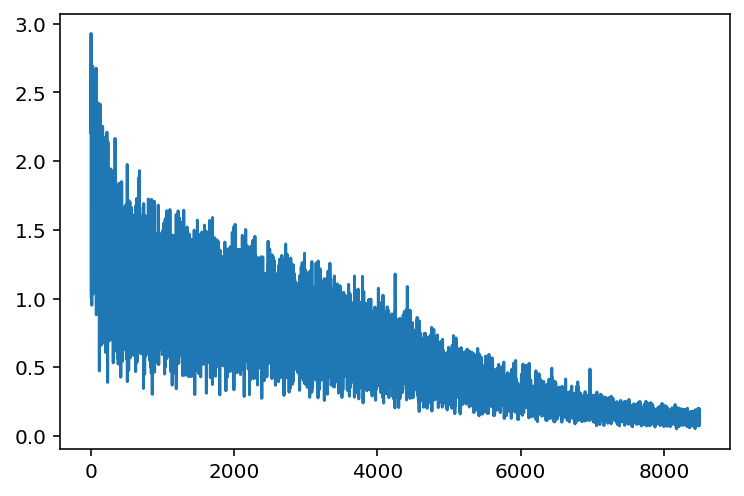

In [152]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [168]:
def generate(self, x, num_notes=50):
#     hidden_states = (torch.zeros(self.num_layers, self.hidden_size), torch.zeros(self.num_layers, self.hidden_size))
    pitch_embedding = self.pitch_embedding(x[..., 0])
    duration_embedding = self.duration_embedding(x[..., 1])
    concat_embedding = torch.cat([pitch_embedding, duration_embedding], dim=-1)

    final_hidden, hidden_states = self.rnn(concat_embedding)
    
    final_hidden = final_hidden[:,-2:-1]
    
    output_pitch_duration = []
    for i in range(num_notes):
      output = self.final_linear(final_hidden)
      pitch_output = torch.softmax(output[...,:self.num_pitches], dim=-1)
      dur_output = torch.softmax(output[...,self.num_pitches:], dim=-1)
      
      selected_pitch = pitch_output.squeeze().multinomial(num_samples=1)
      selected_duration = dur_output.squeeze().multinomial(num_samples=1)
      output_pitch_duration.append([selected_pitch, selected_duration])
      
      if selected_pitch==0 or selected_duration==0:
        break
    
      cur_pitch_embedding = self.pitch_embedding(selected_pitch)
      cur_duration_embedding = self.duration_embedding(selected_duration)
      cur_concat_embedding = torch.cat([cur_pitch_embedding, cur_duration_embedding], dim=-1).unsqueeze(0)
      final_hidden, hidden_states = self.rnn(cur_concat_embedding, hidden_states)
    
    return torch.LongTensor(output_pitch_duration)

model = model.to('cpu')
with torch.no_grad():
  generated_melody = generate(model, item[:10].unsqueeze(0))

In [170]:
generated_melody.shape

torch.Size([38, 2])

In [171]:
recon_note_sequence = category_to_value(generated_melody, pitch_vocab, dur_vocab)
recon = muspy.from_note_representation(recon_note_sequence)


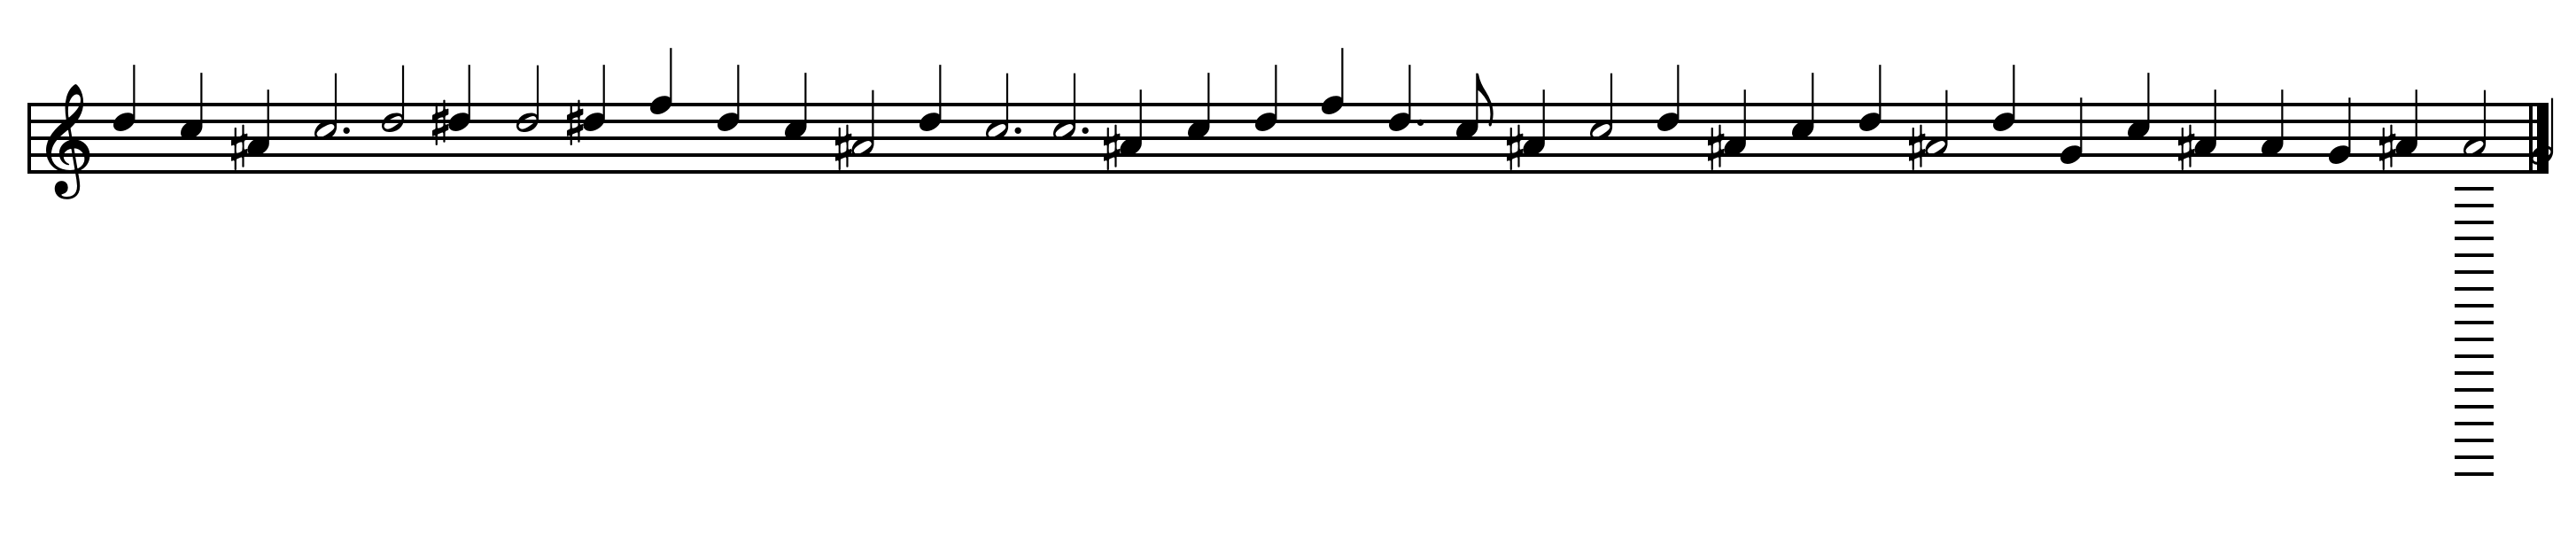

In [225]:
muspy.show_score(recon, figsize=(20,10))

In [184]:
muspy.write_audio('test.wav', recon)

In [183]:
audio[2]

array([ 0, -1], dtype=int16)

In [175]:
import IPython.display as ipd

In [185]:
ipd.Audio('test.wav')

In [62]:
print(unique_pitch)

{48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85}


In [63]:
len(unique_pitch)

38

In [85]:
len(dataset)

9034

In [224]:
model.pitch_embedding.weight.shape

torch.Size([39, 64])